<a href="https://colab.research.google.com/github/vedpatil10/Early-Breast-Cancer-Detection-Using-Machine-Learning-and-Deep-Learning/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KMEANS FINAL 26 ***APRIL***


Enhanced Cancer Classification System (K-Means with SMOTE)
1. Load and preprocess data
2. Set K-Means parameters
3. Train model
4. Evaluate model and view accuracy graph
5. Predict from image (with cancer cell detection)
6. Save model
7. Load model
8. Toggle cancer cell detection
9. Exit

Enter your choice (1-9): 1
Enter the path to your feature CSV file: /content/augmented_image_features.csv

Enter your choice (1-9): 2
Loading data...

Columns in the dataset:
['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'wo

Training Progress: 100%|██████████| 100/100 [00:01<00:00, 88.79it/s]



PCA retained 14 components
Explained variance ratio: 95.31%

Cluster to label mapping: {0: 0, 1: 1}

Model training completed!
K-Means Parameters: n_clusters=2, init=k-means++, max_iter=300
Training Accuracy: 75.76%

Performing cross-validation...
Cross-validation accuracy: 55.17% ± 23.61%

Enhanced Cancer Classification System (K-Means with SMOTE)
1. Load and preprocess data
2. Set K-Means parameters
3. Train model
4. Evaluate model and view accuracy graph
5. Predict from image (with cancer cell detection)
6. Save model
7. Load model
8. Toggle cancer cell detection
9. Exit

Enter your choice (1-9): 4

Test Set Accuracy: 73.22%


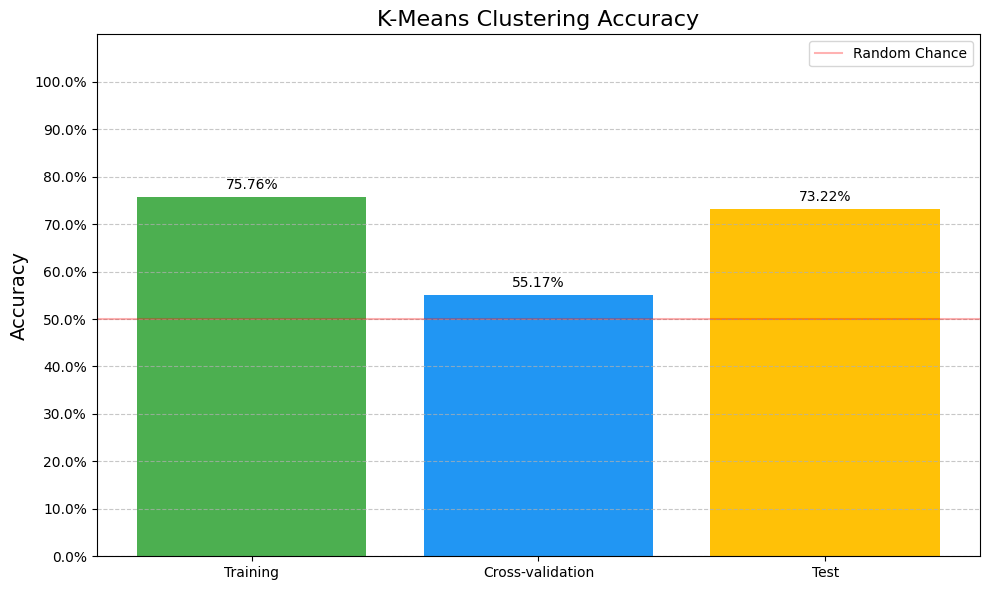

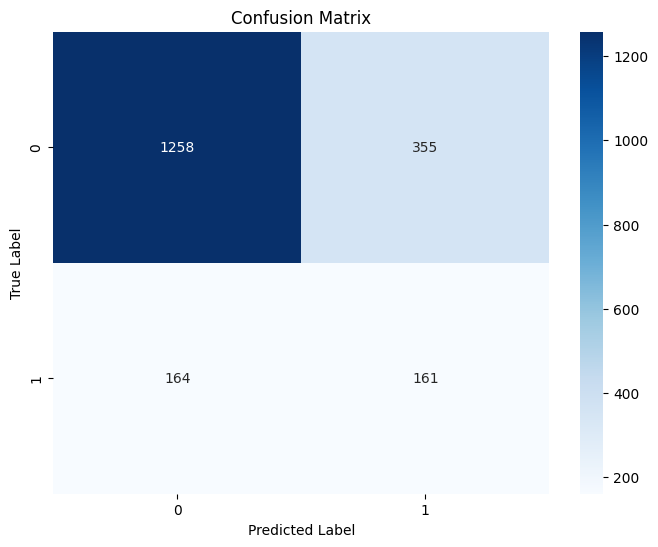


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1613
           1       0.31      0.50      0.38       325

    accuracy                           0.73      1938
   macro avg       0.60      0.64      0.61      1938
weighted avg       0.79      0.73      0.75      1938


Detailed Performance Metrics:
True Negatives (Correct Benign): 1258
False Positives (Incorrect Malignant): 355
False Negatives (Incorrect Benign): 164
True Positives (Correct Malignant): 161

Metrics for Imbalanced Classification:
Sensitivity (Recall): 49.54%
Specificity: 77.99%

Enhanced Cancer Classification System (K-Means with SMOTE)
1. Load and preprocess data
2. Set K-Means parameters
3. Train model
4. Evaluate model and view accuracy graph
5. Predict from image (with cancer cell detection)
6. Save model
7. Load model
8. Toggle cancer cell detection
9. Exit

Enter your choice (1-9): 5
Enter the path to the mammogram image file: /conte

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found BreastTumorFeatureExtractor class, creating instance...
Feature extractor adapter created successfully!
Feature extractor imported successfully!

Reading image from: /content/Benign (3876)_PerspectiveTransform.jpg
Image loaded successfully. Shape: (1080, 1920, 3), Type: uint8

Extracting features...


Feature Extraction:   0%|          | 0/100 [00:00<?, ?it/s]

Using imported external feature extractor...


Feature Extraction: 100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


Features extracted. Shape: (30,)

Processing features through pipeline...

Prediction complete: Benign with 60.56% confidence

Segmenting image to detect potential cancer cells...



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Found 3 potential regions of interest


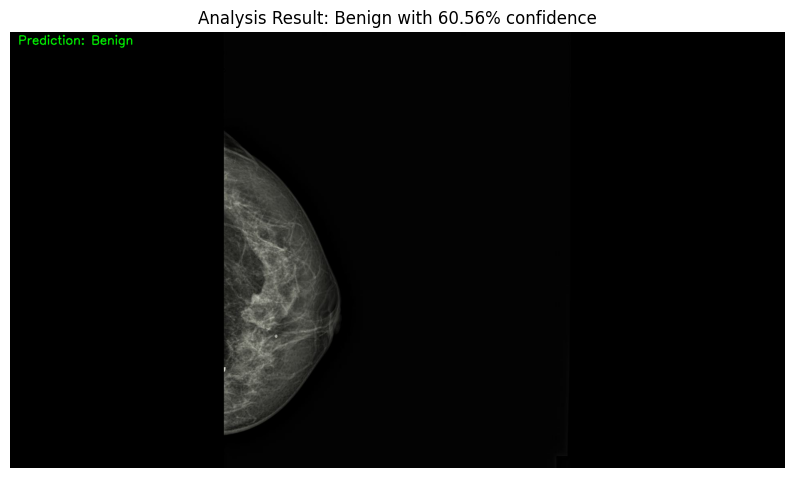


Prediction: Benign
Confidence: 60.56%

Probabilities:
- Benign: 60.56%
- Malignant: 39.44%

Top contributing features:
- mean_symmetry: 1.9111
- mean_concavity: 1.5574
- worst_concave_points: 1.4813
- mean_concave_points: 1.4813
- texture_error: 1.4352

Detected 3 potential cancer regions

Do you want to save this analyzed image? (y/n): n
Image not saved.

Enhanced Cancer Classification System (K-Means with SMOTE)
1. Load and preprocess data
2. Set K-Means parameters
3. Train model
4. Evaluate model and view accuracy graph
5. Predict from image (with cancer cell detection)
6. Save model
7. Load model
8. Toggle cancer cell detection
9. Exit

Enter your choice (1-9): 9
Done!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import joblib
import cv2
import traceback
import importlib.util
import os
from imblearn.over_sampling import SMOTE
from collections import Counter

class EnhancedCancerClassifierKMeans:
    def __init__(self):
        self.model = None
        self.pipeline = None
        self.scaler = StandardScaler()
        self.pca = None
        self.external_feature_extractor = None
        self.feature_extractor_instance = None
        self.segmentation_enabled = True
        self.accuracy_history = []  # To store accuracy values for plotting
        self.smote = SMOTE(random_state=42)  # Add SMOTE for resampling
        self.kmeans_n_clusters = 2  # Default to 2 clusters (benign/malignant)
        self.kmeans_init = 'k-means++'  # Default initialization method
        self.kmeans_max_iter = 300  # Default max iterations
        self.use_pca = True  # PCA enabled by default
        self.pca_components = 0.95  # Default: retain 95% of variance
        self.original_feature_names = None  # Store original feature names before PCA
        self.cluster_to_label = None  # Mapping from clusters to labels

    def load_and_preprocess(self, csv_path):
        """Load and preprocess the feature CSV file"""
        print("Loading data...")

        # Read the CSV file
        self.data = pd.read_csv(csv_path)

        print("\nColumns in the dataset:")
        print(self.data.columns.tolist())

        feature_columns = self.data.select_dtypes(include=[np.number]).columns
        print(f"\nNumber of feature columns found: {len(feature_columns)}")
        print("Feature columns:", feature_columns.tolist())

        non_numeric_columns = self.data.select_dtypes(exclude=[np.number]).columns
        if len(non_numeric_columns) == 0:
            raise ValueError("No label column found in the dataset")

        label_column = non_numeric_columns[0]
        print(f"\nUsing '{label_column}' as the label column")

        self.X = self.data[feature_columns]
        self.y = self.data[label_column]

        print("\nUnique labels found:", self.y.unique().tolist())

        self.y = self.y.apply(lambda x: 1 if 'malignant' in x.lower() else 0)

        # Count instances per class to check class imbalance
        class_counts = self.y.value_counts()
        print("\nClass distribution:")
        for class_label, count in class_counts.items():
            class_name = "Malignant" if class_label == 1 else "Benign"
            print(f"- {class_name}: {count} ({count / len(self.y):.2%})")

        # Split data before applying SMOTE
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        print("\nData preprocessing completed!")
        print(f"Training set size: {len(self.X_train)}")
        print(f"Testing set size: {len(self.X_test)}")
        print(f"Number of features: {self.X_train.shape[1]}")

        # Store original feature names for later interpretation
        self.original_feature_names = feature_columns.tolist()
        self.feature_names = self.original_feature_names.copy()

    def set_kmeans_parameters(self, n_clusters=2, init='k-means++', max_iter=300):
        """Set K-Means hyperparameters"""
        self.kmeans_n_clusters = n_clusters
        self.kmeans_init = init
        self.kmeans_max_iter = max_iter
        print(f"\nK-Means parameters set: n_clusters={n_clusters}, init={init}, max_iter={max_iter}")

    def set_pca_parameters(self, use_pca=True, n_components=0.95):
        """Configure PCA parameters"""
        self.use_pca = use_pca
        self.pca_components = n_components

        status = "ENABLED" if use_pca else "DISABLED"
        components_msg = f"retaining {n_components*100:.0f}% variance" if isinstance(n_components, float) else f"{n_components} components"

        print(f"\nPCA is now {status} ({components_msg if use_pca else ''})")

    def train_model(self):
        """Train the K-Means model with SMOTE and optional PCA"""
        print("Training K-Means model with SMOTE...")

        # Apply SMOTE to handle class imbalance (only on training data)
        print("\nApplying SMOTE to balance the classes...")
        original_class_dist = self.y_train.value_counts()
        print(f"Original training class distribution: {dict(original_class_dist)}")

        # Apply SMOTE to the training data
        X_train_resampled, y_train_resampled = self.smote.fit_resample(self.X_train, self.y_train)

        new_class_dist = pd.Series(y_train_resampled).value_counts()
        print(f"After SMOTE class distribution: {dict(new_class_dist)}")

        # Create pipeline with scaling, optional PCA, and K-Means
        pipeline_steps = [('scaler', StandardScaler())]

        # Add PCA step if enabled
        if self.use_pca:
            print(f"\nAdding PCA to pipeline (n_components={self.pca_components})")
            pipeline_steps.append(('pca', PCA(n_components=self.pca_components, random_state=42)))

        # Add K-Means as the final step
        pipeline_steps.append(('kmeans', KMeans(
            n_clusters=self.kmeans_n_clusters,
            init=self.kmeans_init,
            max_iter=self.kmeans_max_iter,
            random_state=42
        )))

        self.pipeline = Pipeline(pipeline_steps)

        print("\nPerforming Model Training...")

        # Train the model with progress tracking
        with tqdm(total=100, desc="Training Progress") as pbar:
            self.pipeline.fit(X_train_resampled)
            for i in range(100):
                time.sleep(0.01)
                pbar.update(1)

        # Get model components
        self.model = self.pipeline.named_steps['kmeans']

        # Get PCA if it was used
        if self.use_pca:
            self.pca = self.pipeline.named_steps['pca']
            # Update feature names for PCA components
            self.feature_names = [f"PC{i+1}" for i in range(self.pca.n_components_)]
            print(f"\nPCA retained {self.pca.n_components_} components")
            print(f"Explained variance ratio: {sum(self.pca.explained_variance_ratio_):.2%}")

        # Map clusters to labels based on majority voting
        cluster_labels = self.pipeline.predict(X_train_resampled)
        self.cluster_to_label = {}
        for cluster in range(self.kmeans_n_clusters):
            # Get indices of samples in this cluster
            cluster_indices = np.where(cluster_labels == cluster)[0]
            # Get corresponding true labels
            cluster_true_labels = y_train_resampled.iloc[cluster_indices]
            # Find the most common true label
            most_common_label = Counter(cluster_true_labels).most_common(1)[0][0]
            self.cluster_to_label[cluster] = most_common_label
        print(f"\nCluster to label mapping: {self.cluster_to_label}")

        print("\nModel training completed!")
        print(f"K-Means Parameters: n_clusters={self.model.n_clusters}, init={self.model.init}, max_iter={self.model.max_iter}")

        # Get predictions on training set
        train_clusters = self.pipeline.predict(self.X_train)
        train_pred = np.array([self.cluster_to_label[cluster] for cluster in train_clusters])
        train_accuracy = accuracy_score(self.y_train, train_pred)
        print(f"Training Accuracy: {train_accuracy:.2%}")

        # Store accuracy for plotting
        self.accuracy_history.append(('Training', train_accuracy))

        # Perform cross-validation to estimate model performance
        print("\nPerforming cross-validation...")
        def kmeans_cross_val_score(pipeline, X, y, cv, cluster_to_label):
            scores = []
            for train_idx, val_idx in cv.split(X, y):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
                pipeline.fit(X_train)
                val_clusters = pipeline.predict(X_val)
                val_pred = np.array([cluster_to_label[cluster] for cluster in val_clusters])
                score = accuracy_score(y_val, val_pred)
                scores.append(score)
            return np.array(scores)

        from sklearn.model_selection import StratifiedKFold
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = kmeans_cross_val_score(self.pipeline, self.X, self.y, cv, self.cluster_to_label)
        print(f"Cross-validation accuracy: {cv_scores.mean():.2%} ± {cv_scores.std():.2%}")

        # Store cross-validation accuracy for plotting
        self.accuracy_history.append(('Cross-validation', cv_scores.mean()))

    def evaluate_model(self):
        """Evaluate the model and display metrics"""
        if self.pipeline is None:
            raise ValueError("Model not trained yet! Please train the model first.")

        # Make predictions
        test_clusters = self.pipeline.predict(self.X_test)
        y_pred = np.array([self.cluster_to_label[cluster] for cluster in test_clusters])

        # Accuracy
        test_accuracy = accuracy_score(self.y_test, y_pred)
        print(f"\nTest Set Accuracy: {test_accuracy:.2%}")

        # Store test accuracy for plotting
        self.accuracy_history.append(('Test', test_accuracy))

        # Plot accuracy graph
        self.plot_accuracy_graph()

        # Confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # Detailed report
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))

        print("\nDetailed Performance Metrics:")
        print(f"True Negatives (Correct Benign): {cm[0,0]}")
        print(f"False Positives (Incorrect Malignant): {cm[0,1]}")
        print(f"False Negatives (Incorrect Benign): {cm[1,0]}")
        print(f"True Positives (Correct Malignant): {cm[1,1]}")

        # Calculate and display additional metrics specific to imbalanced datasets
        print("\nMetrics for Imbalanced Classification:")
        sensitivity = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
        specificity = cm[0,0] / (cm[0,0] + cm[0,1]) if (cm[0,0] + cm[0,1]) > 0 else 0
        print(f"Sensitivity (Recall): {sensitivity:.2%}")
        print(f"Specificity: {specificity:.2%}")

    def plot_accuracy_graph(self):
        """Plot the accuracy graph showing training, cross-validation, and test accuracy"""
        if not self.accuracy_history:
            print("No accuracy data available for plotting.")
            return

        plt.figure(figsize=(10, 6))

        # Extract labels and values from accuracy_history
        labels = [item[0] for item in self.accuracy_history]
        values = [item[1] for item in self.accuracy_history]

        # Create bar chart with custom color for each type of accuracy
        colors = ['#4CAF50', '#2196F3', '#FFC107']  # Green, Blue, Amber
        bars = plt.bar(labels, values, color=colors[:len(labels)])

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2%}', ha='center', va='bottom')

        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Set plot title and labels
        plt.title('K-Means Clustering Accuracy', fontsize=16)
        plt.ylabel('Accuracy', fontsize=14)
        plt.ylim(0, 1.1)  # Set y-axis limit to have room for text labels

        # Add a horizontal line showing 0.5 threshold (random chance)
        plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3, label='Random Chance')

        # Customize tick marks
        plt.yticks([i/10 for i in range(0, 11, 1)], [f'{i/10:.1%}' for i in range(0, 11, 1)])

        plt.legend()
        plt.tight_layout()
        plt.show()

    def import_feature_extractor(self, file_path):
        """Import external feature extraction logic from a Python file"""
        try:
            print(f"\nImporting feature extractor from: {file_path}")

            # Check if file exists
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"File not found: {file_path}")

            # Get the file name without extension
            module_name = os.path.splitext(os.path.basename(file_path))[0]

            # Load the module dynamically
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            if spec is None:
                raise ImportError(f"Could not import module from {file_path}")

            feature_module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(feature_module)

            # Check if module contains BreastTumorFeatureExtractor class
            if hasattr(feature_module, 'BreastTumorFeatureExtractor'):
                print("Found BreastTumorFeatureExtractor class, creating instance...")
                self.feature_extractor_instance = feature_module.BreastTumorFeatureExtractor()

                # Create a wrapper function to adapt the class's method to our expected calculate_features interface
                def calculate_features_wrapper(image):
                    # Save image to a temporary file
                    temp_image_path = 'temp_image.jpg'
                    cv2.imwrite(temp_image_path, image)

                    # Extract features using the class's method
                    features_dict = self.feature_extractor_instance._extract_features(temp_image_path)

                    # Remove temporary file
                    if os.path.exists(temp_image_path):
                        os.remove(temp_image_path)

                    if features_dict is None:
                        print("Feature extraction failed, using zeros")
                        feature_names = [
                            'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
                            'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry',
                            'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error',
                            'area_error', 'smoothness_error', 'compactness_error', 'concavity_error',
                            'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
                            'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
                            'worst_smoothness', 'worst_compactness', 'worst_concavity',
                            'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'
                        ]
                        features = np.zeros(30)
                        features_dict = dict(zip(feature_names, features))

                    # Create feature array from dictionary (excluding non-feature keys)
                    feature_keys = [
                        'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
                        'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry',
                        'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error',
                        'area_error', 'smoothness_error', 'compactness_error', 'concavity_error',
                        'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
                        'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
                        'worst_smoothness', 'worst_compactness', 'worst_concavity',
                        'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'
                    ]

                    features_array = np.array([features_dict[key] for key in feature_keys])
                    return features_array, features_dict

                # Set the wrapper function as our external feature extractor
                self.external_feature_extractor = calculate_features_wrapper
                print("Feature extractor adapter created successfully!")

            # If the module doesn't have the expected class but has calculate_features function directly
            elif hasattr(feature_module, 'calculate_features'):
                print("Found calculate_features function")
                self.external_feature_extractor = feature_module.calculate_features
            else:
                raise AttributeError("The imported module must contain either a 'calculate_features(image)' function or a 'BreastTumorFeatureExtractor' class")

            print("Feature extractor imported successfully!")

            # Get additional information if available
            if hasattr(feature_module, '__doc__') and feature_module.__doc__:
                print(f"\nModule description: {feature_module.__doc__}")

            return True

        except Exception as e:
            print(f"Error importing feature extractor: {str(e)}")
            print(f"Traceback: {traceback.format_exc()}")
            return False

    def segment_mammogram(self, image):
        """
        Segment the mammogram image to detect potential cancer cells
        Returns potential cancerous regions
        """
        # Create a copy of the original image for processing
        processed = image.copy()

        # Convert to grayscale if needed
        if len(image.shape) > 2 and image.shape[2] > 1:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image.copy()

        # Apply contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(gray)

        # Denoise the image
        denoised = cv2.fastNlMeansDenoising(enhanced, None, 10, 7, 21)

        # Apply threshold to segment potential mass regions
        _, binary = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Apply morphological operations to clean up the mask
        kernel = np.ones((5, 5), np.uint8)
        opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)

        # Find contours
        contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours by size
        min_area = 100  # Minimum area of potential mass
        potential_masses = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area:
                potential_masses.append(contour)

        # Return the potential masses contours
        return potential_masses

    def highlight_cancer_regions(self, image, contours, prediction):
        """
        Highlight potential cancer regions in the original image
        Returns a new image with highlighted regions
        """
        # Create a copy of the image for drawing
        result = image.copy()

        # Only highlight regions if the prediction is malignant
        if prediction == "Malignant":
            # Draw all contours on the image with red color
            cv2.drawContours(result, contours, -1, (0, 0, 255), 2)

            # Find the largest contour (likely to be the main mass)
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)

                # Draw a filled region for the largest contour with transparency
                overlay = result.copy()
                cv2.drawContours(overlay, [largest_contour], -1, (0, 0, 255), -1)

                # Add text label near the largest contour
                M = cv2.moments(largest_contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    cv2.putText(result, "Potential Cancer", (cx - 20, cy - 20),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

                # Apply the overlay with transparency
                alpha = 0.3
                cv2.addWeighted(overlay, alpha, result, 1 - alpha, 0, result)

        # Add overall prediction text
        cv2.putText(result, f"Prediction: {prediction}", (20, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255) if prediction == "Malignant" else (0, 255, 0), 2)

        return result

    def predict_from_image(self, image_path, display_image=True, save_visual_output=False, output_path=None):
        """Predict cancer type directly from image and highlight cancer cells if detected"""
        if self.pipeline is None:
            raise ValueError("Model not trained yet! Please train the model first.")

        print(f"\nReading image from: {image_path}")
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not read image from path: {image_path}")

        print(f"Image loaded successfully. Shape: {image.shape}, Type: {image.dtype}")

        print("\nExtracting features...")
        with tqdm(total=100, desc="Feature Extraction") as pbar:
            try:
                # Use external feature extractor if available, otherwise use internal
                if self.external_feature_extractor:
                    print("Using imported external feature extractor...")
                    features, feature_dict = self.external_feature_extractor(image)
                else:
                    print("Using internal feature calculation logic...")
                    raise NotImplementedError("No feature extractor provided! Please import a feature extractor first.")

                print(f"\nFeatures extracted. Shape: {features.shape}")
                pbar.update(100)
            except Exception as e:
                print(f"\nError in feature extraction: {str(e)}")
                raise

        print("\nProcessing features through pipeline...")
        # Process features through the pipeline
        features_reshaped = features.reshape(1, -1)

        cluster = self.pipeline.predict(features_reshaped)[0]
        prediction = self.cluster_to_label[cluster]
        cancer_type = "Malignant" if prediction == 1 else "Benign"

        # Calculate pseudo-confidence based on distance to cluster center
        transformed_features = self.pipeline.named_steps['scaler'].transform(features_reshaped)
        if self.use_pca:
            transformed_features = self.pipeline.named_steps['pca'].transform(transformed_features)
        cluster_centers = self.model.cluster_centers_
        distances = np.linalg.norm(transformed_features - cluster_centers, axis=1)
        confidence = 1 / (1 + distances[cluster])  # Inverse distance as confidence
        confidence = confidence / np.sum(1 / (1 + distances))  # Normalize to sum to 1

        prob_benign = 1 - confidence if prediction == 1 else confidence
        prob_malignant = confidence if prediction == 1 else 1 - confidence

        print(f"\nPrediction complete: {cancer_type} with {confidence:.2%} confidence")

        # Feature importance based on distance to cluster centers
        feature_importance = {}
        if self.use_pca:
            # First transform the features using just the scaler (before PCA)
            X_scaled = self.pipeline.named_steps['scaler'].transform(features_reshaped)

            # Then apply PCA transform
            X_pca = self.pca.transform(X_scaled)

            # Use distance to cluster center in PCA space as importance
            pc_importance = np.abs(X_pca[0] - self.model.cluster_centers_[cluster])

            # Calculate how each original feature contributes to important PCs
            for i, orig_feature in enumerate(self.original_feature_names):
                feature_importance[orig_feature] = 0
                for j in range(len(pc_importance)):
                    feature_importance[orig_feature] += abs(self.pca.components_[j, i] * pc_importance[j])
        else:
            # Use distance to cluster center in original feature space
            X_scaled = self.pipeline.named_steps['scaler'].transform(features_reshaped)[0]
            center_scaled = self.model.cluster_centers_[cluster]
            importance = np.abs(X_scaled - center_scaled)
            for i, feature_name in enumerate(self.original_feature_names):
                feature_importance[feature_name] = importance[i]

        # Sort features by importance
        sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
        top_features = dict(sorted_features[:5])  # Top 5 most important features

        # Segment the image to detect potential cancer cells if enabled
        cancer_regions = None
        result_image = None

        if self.segmentation_enabled:
            print("\nSegmenting image to detect potential cancer cells...")
            try:
                potential_regions = self.segment_mammogram(image)
                print(f"Found {len(potential_regions)} potential regions of interest")

                # Highlight these regions on the image
                result_image = self.highlight_cancer_regions(image, potential_regions, cancer_type)

                # Display the image if requested
                if display_image and result_image is not None:
                    plt.figure(figsize=(10, 8))
                    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                    plt.title(f"Analysis Result: {cancer_type} with {confidence:.2%} confidence")
                    plt.axis('off')
                    plt.show()

                # Save the output image if requested
                if save_visual_output and output_path:
                    cv2.imwrite(output_path, result_image)
                    print(f"Analysis image saved to: {output_path}")

                # Store regions for returning
                cancer_regions = potential_regions

            except Exception as e:
                print(f"Error during image segmentation: {str(e)}")
                print("Continuing with classification result only...")

        result = {
            'cancer_type': cancer_type,
            'confidence': confidence,
            'probabilities': {
                'benign': prob_benign,
                'malignant': prob_malignant
            },
            'features': feature_dict,
            'top_features': top_features,
            'cancer_regions': cancer_regions,
            'result_image': result_image
        }

        return result

    def save_model(self, path):
        """Save the trained model, scaler, pipeline"""
        if self.pipeline is None:
            raise ValueError("No trained model to save!")

        model_data = {
            'pipeline': self.pipeline,
            'feature_names': self.feature_names if hasattr(self, 'feature_names') else None,
            'accuracy_history': self.accuracy_history,
            'n_clusters': self.kmeans_n_clusters,
            'init': self.kmeans_init,
            'max_iter': self.kmeans_max_iter,
            'cluster_to_label': self.cluster_to_label
        }
        joblib.dump(model_data, path)
        print(f"Model saved to {path}")

    def load_model(self, path):
        """Load a trained model, scaler, pipeline"""
        model_data = joblib.load(path)
        self.pipeline = model_data['pipeline']
        self.model = self.pipeline.named_steps['kmeans']
        self.scaler = self.pipeline.named_steps['scaler']

        if 'feature_names' in model_data and model_data['feature_names'] is not None:
            self.feature_names = model_data['feature_names']

        if 'accuracy_history' in model_data and model_data['accuracy_history'] is not None:
            self.accuracy_history = model_data['accuracy_history']

        if 'n_clusters' in model_data and model_data['n_clusters'] is not None:
            self.kmeans_n_clusters = model_data['n_clusters']

        if 'init' in model_data and model_data['init'] is not None:
            self.kmeans_init = model_data['init']

        if 'max_iter' in model_data and model_data['max_iter'] is not None:
            self.kmeans_max_iter = model_data['max_iter']

        if 'cluster_to_label' in model_data and model_data['cluster_to_label'] is not None:
            self.cluster_to_label = model_data['cluster_to_label']

        print("Model loaded successfully!")
        print(f"K-Means Parameters - n_clusters: {self.model.n_clusters}, init: {self.model.init}, max_iter: {self.model.max_iter}")

def main():
    classifier = EnhancedCancerClassifierKMeans()
    feature_extractor_path = None

    while True:
        print("\nEnhanced Cancer Classification System (K-Means with SMOTE)")
        print("1. Load and preprocess data")
        print("2. Set K-Means parameters")
        print("3. Train model")
        print("4. Evaluate model and view accuracy graph")
        print("5. Predict from image (with cancer cell detection)")
        print("6. Save model")
        print("7. Load model")
        print("8. Toggle cancer cell detection")
        print("9. Exit")

        choice = input("\nEnter your choice (1-9): ")
        if choice == '1':
            csv_path = input("Enter the path to your feature CSV file: ")
            try:
                classifier.load_and_preprocess(csv_path)
            except Exception as e:
                print(f"Error loading data: {str(e)}")
                print("\nPlease make sure your CSV file:")
                print("1. Contains numeric feature columns")
                print("2. Has a label column (e.g., 'label' or 'diagnosis')")
                print("3. Is properly formatted and not corrupted")

        elif choice == '2':
            print("\nSetting K-Means parameters:")
            n_clusters = int(input("Enter number of clusters (default: 2): ") or 2)
            init = input("Enter initialization method (k-means++, random) (default: k-means++): ") or 'k-means++'
            max_iter = int(input("Enter max iterations (default: 300): ") or 300)

            try:
                classifier.set_kmeans_parameters(n_clusters=n_clusters, init=init, max_iter=max_iter)
            except Exception as e:
                print(f"Error setting K-Means parameters: {str(e)}")

        elif choice == '3':
            if not hasattr(classifier, 'X_train'):
                print("Please load and preprocess data first (Option 1)")
                continue
            try:
                classifier.train_model()
            except Exception as e:
                print(f"Error training model: {str(e)}")

        elif choice == '4':
            if classifier.pipeline is None:
                print("Please train the model first (Option 3)")
                continue
            try:
                classifier.evaluate_model()
            except Exception as e:
                print(f"Error evaluating model: {str(e)}")

        elif choice == '5':
            if classifier.pipeline is None:
                print("Please train the model first (Option 3)")
                continue
            image_path = input("Enter the path to the mammogram image file: ")

            # Check if feature extractor is imported
            if not classifier.external_feature_extractor:
                # Check if path is already stored
                if feature_extractor_path:
                    try:
                        print(f"Using previously imported feature extractor from: {feature_extractor_path}")
                        classifier.import_feature_extractor(feature_extractor_path)
                    except Exception as e:
                        print(f"Error reusing feature extraction logic: {str(e)}")
                        feature_extractor_path = input("Enter the path to your feature extraction .py file: ")
                        try:
                            classifier.import_feature_extractor(feature_extractor_path)
                        except Exception as e:
                            print(f"Error importing feature extraction logic: {str(e)}")
                            continue
                else:
                    feature_extractor_path = input("Enter the path to your feature extraction .py file: ")
                    try:
                        classifier.import_feature_extractor(feature_extractor_path)
                    except Exception as e:
                        print(f"Error importing feature extraction logic: {str(e)}")
                        continue

            try:
                # First predict and display the image without saving
                result = classifier.predict_from_image(image_path, display_image=True, save_visual_output=False)

                print(f"\nPrediction: {result['cancer_type']}")
                print(f"Confidence: {result['confidence']:.2%}")
                print("\nProbabilities:")
                print(f"- Benign: {result['probabilities']['benign']:.2%}")
                print(f"- Malignant: {result['probabilities']['malignant']:.2%}")

                # Display top contributing features
                print("\nTop contributing features:")
                for feature, importance in result['top_features'].items():
                    print(f"- {feature}: {importance:.4f}")

                if result['cancer_regions'] is not None:
                    print(f"\nDetected {len(result['cancer_regions'])} potential cancer regions")

                # After displaying, ask if user wants to save the image
                if result['result_image'] is not None:
                    save_choice = input("\nDo you want to save this analyzed image? (y/n): ").lower()
                    if save_choice == 'y' or save_choice == 'yes':
                        output_path = input("Enter path to save the analyzed image: ")
                        if output_path:
                            cv2.imwrite(output_path, result['result_image'])
                            print(f"Analysis image saved to: {output_path}")
                        else:
                            print("No path provided. Image not saved.")
                    else:
                        print("Image not saved.")

            except Exception as e:
                print(f"Error processing image: {str(e)}")
                print(traceback.format_exc())

        elif choice == '6':
            if classifier.pipeline is None:
                print("Please train the model first (Option 3)")
                continue
            path = input("Enter path to save the model: ")
            try:
                classifier.save_model(path)
            except Exception as e:
                print(f"Error saving model: {str(e)}")

        elif choice == '7':
            path = input("Enter path to load the model: ")
            try:
                classifier.load_model(path)
            except Exception as e:
                print(f"Error loading model: {str(e)}")

        elif choice == '8':
            classifier.segmentation_enabled = not classifier.segmentation_enabled
            status = "ENABLED" if classifier.segmentation_enabled else "DISABLED"
            print(f"\nCa\ncer cell detection is now {status}")

        elif choice == '9':
            print("Done!")
            break

        else:
            print("Invalid choice! Please try again.")

if __name__ == "__main__":
    main()
